In [1]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

rallyname = 'Acropolis 2022'
raceDate = '9/2022'
surface = 'Gravel'
competition = 'Wrc'

link = 'https://www.ewrc-results.com/results/73366-eko-acropolis-rally-greece-2022/?s='
startat, no_ss=372811, int(16)

canceled = []

ss_S= [372811, 372814, 372816, 372817, 372818, 372819, 372820, 372835, 372836, 372837, 372838, 372839, 372841, 372842, 372843, 372844]

stages = [number for number in range(no_ss)]

rally_23 = []

In [2]:
for ss in range(0,len(ss_S)):
    
    my_url11 = link + str(ss_S[ss])
    #print(my_url11)
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[0]
    data.columns=['Pos.', 'No', 'Crew', 'Gr/Cl','ss_time', 'Diff', 'Speed']
    data['ss']=ss+1
    equal = '=' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('=', method='ffill')
        data['Pos.'] = data['Pos.'].astype(str).astype(float)
    #print(data.dtypes)
    #print(data)
    rally_23.append(data) 

In [3]:
rally2023_stages = pd.concat(rally_23, axis=0)

In [4]:
rally2023_stages = pd.concat(rally_23, axis=0)
rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(int)
#rally2023_stages['No'] = rally2023_stages['No.'].str[1:]
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['date'] = raceDate
rally2023_stages['surface'] = surface
rally2023_stages['competition'] = competition
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:14]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No,Crew,Gr/Cl,ss_time,Diff,Speed,ss,Race,date,surface,competition,cou
0,1,#11,Neuville Thier,RC1 M,1:58.4,-,59.3,1,Acropolis 2022,9/2022,Gravel,Wrc,1
1,2,#22,Suninen Teemu,RC2,1:58.5,+0.1 + 0.1,59.2 0.05,1,Acropolis 2022,9/2022,Gravel,Wrc,2
2,3,#6,Sordo Dani -,RC1 M,1:59.4,+1.0 + 0.9,58.8 0.51,1,Acropolis 2022,9/2022,Gravel,Wrc,3
3,4,#8,Tänak Ott - J,RC1 M,1:59.5,+1.1 + 0.1,58.7 0.56,1,Acropolis 2022,9/2022,Gravel,Wrc,4
4,5,#25,Lindholm Emil,RC2,1:59.6,+1.2 + 0.1,58.7 0.62,1,Acropolis 2022,9/2022,Gravel,Wrc,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,49,#43,Covi Carlo -,RC2,14:26.6,+4:32.1 + 14.9,70.2 16.1,16,Acropolis 2022,9/2022,Gravel,Wrc,49
49,50,#78,Kalamaras Teo,RC4,15:50.2,+5:55.7 + 1:23.6,64.0 21.1,16,Acropolis 2022,9/2022,Gravel,Wrc,50
50,51,#80,Kaltsounis H.,RC4,16:32.8,+6:38.3 + 42.6,61.3 23.6,16,Acropolis 2022,9/2022,Gravel,Wrc,51
51,52,#79,Kanellopoulos,RC4,17:35.1,+7:40.6 + 1:02.3,57.7 27.3,16,Acropolis 2022,9/2022,Gravel,Wrc,52


In [5]:
rally2023_stageClass=rally2023_stages.drop(['No', 'Diff', 'Speed', 'ss_time', 'cou', 'date', 'surface', 'competition'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['No', 'Diff', 'Speed', 'cou', 'date', 'surface', 'competition', 'Pos.'], axis=1)
rally2023_stageClass['Pos.'] = rally2023_stageClass['Pos.'].astype(str)
rally2023_ClassView = rally2023_stageClass.set_index(['Crew','Gr/Cl','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['Crew','Gr/Cl', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
#rally2023_stageClass2 = rally2023_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
#rally2023_ClassView2 = rally2023_stageClass2.set_index(['No','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
#rally2023_ClassView2 = rally2023_ClassView2.fillna("-")

In [6]:
rally2023_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2023_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv')

In [7]:
pd.set_option("display.max_columns", None)

dfi.export(rally2023_ClassView, (str(rallyname) + '_Stages_Classification.png'))


In [8]:
rally2023_stages[['time_mm','time_ss']] = rally2023_stages['ss_time'].str.split(':', expand=True)
#rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'No', 'ss_time', 'Diff',  'Speed', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv('../' + str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages


,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec
0,Neuville Thier,RC1 M,1,Acropolis 2022,9/2022,Gravel,Wrc,1,118.4
1,Suninen Teemu,RC2,1,Acropolis 2022,9/2022,Gravel,Wrc,2,118.5
2,Sordo Dani -,RC1 M,1,Acropolis 2022,9/2022,Gravel,Wrc,3,119.4
3,Tänak Ott - J,RC1 M,1,Acropolis 2022,9/2022,Gravel,Wrc,4,119.5
4,Lindholm Emil,RC2,1,Acropolis 2022,9/2022,Gravel,Wrc,5,119.6
...,...,...,...,...,...,...,...,...,...
48,Covi Carlo -,RC2,16,Acropolis 2022,9/2022,Gravel,Wrc,49,866.6
49,Kalamaras Teo,RC4,16,Acropolis 2022,9/2022,Gravel,Wrc,50,950.2
50,Kaltsounis H.,RC4,16,Acropolis 2022,9/2022,Gravel,Wrc,51,992.8
51,Kanellopoulos,RC4,16,Acropolis 2022,9/2022,Gravel,Wrc,52,1055.1


In [9]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
min_value_G = rally2023_stages.groupby(['Race', 'ss', 'Gr/Cl'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)
min_value2_G =  pd.DataFrame(min_value_G)

min_value2_G = min_value2_G.rename(columns={'time_SS_sec' : 'min_time_Gr'})
min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2_G

min_time_Gr
Race           ss Gr/Cl             
Acropolis 2022 1  RC1          121.1
                  RC1 M        118.4
                  RC2          118.5
                  RC3          123.5
                  RC4          132.9
...                              ...
               16 RC1          623.3
                  RC1 M        594.5
                  RC2          626.5
                  RC3          663.2
                  RC4          770.7

[80 rows x 1 columns]

In [10]:
ss_times_F_G = rally2023_stages.merge(min_value2_G, on=['Race', 'ss', 'Gr/Cl'])
ss_times_F = ss_times_F_G.merge(min_value2, on=['Race', 'ss'])
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff_G']=ss_times_F['time_SS_sec'] - ss_times_F['min_time_Gr']
ss_times_F['diff_G%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time_Gr'])/ss_times_F['min_time_Gr']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time_Gr,min_time,diff,diff_G,diff_G%,SS.
0,Neuville Thier,RC1 M,1,Acropolis 2022,9/2022,Gravel,Wrc,1,118.4,118.4,118.4,0.0,0.0,0.000000,01
1,Sordo Dani -,RC1 M,1,Acropolis 2022,9/2022,Gravel,Wrc,3,119.4,118.4,118.4,1.0,1.0,0.844595,01
2,Tänak Ott - J,RC1 M,1,Acropolis 2022,9/2022,Gravel,Wrc,4,119.5,118.4,118.4,1.1,1.1,0.929054,01
3,Loeb Sébastien,RC1 M,1,Acropolis 2022,9/2022,Gravel,Wrc,6,119.7,118.4,118.4,1.3,1.3,1.097973,01
4,Rovanperä Kall,RC1 M,1,Acropolis 2022,9/2022,Gravel,Wrc,8,119.9,118.4,118.4,1.5,1.5,1.266892,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,Mauro Sánchez,RC4,16,Acropolis 2022,9/2022,Gravel,Wrc,47,848.0,770.7,594.5,253.5,77.3,10.029843,16
965,Theocharopoulo,RC4,16,Acropolis 2022,9/2022,Gravel,Wrc,48,851.7,770.7,594.5,257.2,81.0,10.509926,16
966,Kalamaras Teo,RC4,16,Acropolis 2022,9/2022,Gravel,Wrc,50,950.2,770.7,594.5,355.7,179.5,23.290515,16
967,Kaltsounis H.,RC4,16,Acropolis 2022,9/2022,Gravel,Wrc,51,992.8,770.7,594.5,398.3,222.1,28.817958,16


In [12]:
Group = 'RC2'
ss_times_WRC = ss_times_F[ss_times_F['Gr/Cl'].str.contains(Group)]
ss_times_WRC.to_csv(str(rallyname) + str(Group) + '.csv')
ss_times_WRC

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time_Gr,min_time,diff,diff_G,diff_G%,SS.
10,Suninen Teemu,RC2,1,Acropolis 2022,9/2022,Gravel,Wrc,2,118.5,118.5,118.4,0.1,0.0,0.000000,01
11,Lindholm Emil,RC2,1,Acropolis 2022,9/2022,Gravel,Wrc,5,119.6,118.5,118.4,1.2,1.1,0.928270,01
12,Gill Gaurav -,RC2,1,Acropolis 2022,9/2022,Gravel,Wrc,7,119.7,118.5,118.4,1.3,1.2,1.012658,01
13,Linnamäe Georg,RC2,1,Acropolis 2022,9/2022,Gravel,Wrc,9,120.0,118.5,118.4,1.6,1.5,1.265823,01
14,Ingram Chris,RC2,1,Acropolis 2022,9/2022,Gravel,Wrc,11,120.2,118.5,118.4,1.8,1.7,1.434599,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,Salvi Diogo -,RC2,16,Acropolis 2022,9/2022,Gravel,Wrc,40,761.9,626.5,594.5,167.4,135.4,21.612131,16
949,Arengi Bentivo,RC2,16,Acropolis 2022,9/2022,Gravel,Wrc,41,764.3,626.5,594.5,169.8,137.8,21.995211,16
950,Díaz-Aboitiz M,RC2,16,Acropolis 2022,9/2022,Gravel,Wrc,45,779.2,626.5,594.5,184.7,152.7,24.373504,16
951,Covi Carlo -,RC2,16,Acropolis 2022,9/2022,Gravel,Wrc,49,866.6,626.5,594.5,272.1,240.1,38.324022,16


In [13]:
ss_times_F3 =ss_times_WRC.drop(['Gr/Cl','time_SS_sec','cou', 'ss'], axis=1)
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff_G', index='Crew', columns=['Race', 'SS.'])
ss_times_F4

Race           Acropolis 2022                                            \
SS.                        01     02     03     04     05     06     07   
Crew                                                                      
Arengi Bentivo           13.5  114.4  111.6  108.2   65.0  115.7  182.9   
Athanassopoulo            8.0   83.2   92.6  163.4   72.4   87.1  196.9   
Athanassoulas             3.9    9.4   26.9   19.2   17.7   21.1   33.0   
Brynildsen Eyv            2.6   13.4   17.9   12.2    9.4   14.8   20.0   
Bulacia Bruno             5.1   28.6   24.5   18.1   10.9    9.4   19.9   
Castro Eduardo           13.5   60.6  120.0   75.8   50.3   62.2  119.4   
Covi Carlo  -            11.9  159.2  144.9  211.7  107.2  184.0  274.9   
Díaz-Aboitiz M            7.5  121.5  156.4  131.8  116.7  139.4  211.4   
Gill Gaurav  -            1.2   36.9   33.6  224.0   20.3   22.9   43.5   
Gryazin Nikola            3.0   11.7   13.7    6.3    7.9    0.0   12.8   
Halkias Efthim            9.6   75.9    NaN    NaN    NaN    NaN    NaN   
Ingram Chris              1.7    9.3   20.8   10.1  208.1   11.2   15.6   
Karellis C.  -            8.0   51.2   76.1   69.3   49.2   48.8  106.7   
Kechagias Gior            9.7   39.6   99.1   70.3   36.7   45.1   61.5   
Kremer Armin              3.4   41.6   49.2   51.6   25.6   39.1   60.1   
Lindholm Emil             1.1    6.6    2.9    0.0    0.0    3.2   11.1   
Linnamäe Georg            1.5   19.5   17.1   17.1    9.3    8.8   24.6   
Martínez Fonte            3.9   40.6   42.7   29.1   16.1   16.6   51.8   
Mikkelsen Andr            NaN    0.0    0.0    7.6    4.2    0.3    0.0   
Munster Grégoi            NaN   50.7   36.4   29.4   17.6   22.0   39.7   
Panagiotis Rou           14.1   31.6   37.6   39.7   30.5   50.3    NaN   
Panteli Petros           13.7   62.4   83.8   81.7   53.6   68.6    NaN   
Prokop Martin             3.8   31.7   57.8   34.8   24.1   34.8   63.7   
Puskádi János             7.9   90.4   97.8  108.3   65.6  102.4  177.0   
Pyck Filip  -            10.4   90.5    NaN    NaN    NaN    NaN    NaN   
Raoux Jean-Mic            8.0   67.5   67.1   64.8   37.1   47.5  120.0   
Rieu Jonathan             8.6   78.1   64.0   76.6   54.9   58.6  109.0   
Rosati Frédéri            9.0   82.1   83.3   84.0   50.8   68.0  144.5   
Rossel Yohan              3.5   14.6   12.5    8.1   11.0   14.5   17.6   
Salvi Diogo  -            7.0   82.3   72.1   79.0   51.6   73.7  141.9   
Spanos Dionyss           13.0  122.7  147.8  127.3   94.8  112.5  194.8   
Stefanis Manos           12.9  105.9  127.3    NaN    NaN    NaN    NaN   
Suninen Teemu             0.0   12.1   19.4    9.7    1.8    4.7   13.3   
Tsouloftas A.             4.9   18.9   34.6   20.4   19.4    8.4   26.8   
Vassilakis Geo           12.3  124.3  156.8    NaN    NaN    NaN    NaN   
Velanis Vassil           10.6   72.6   77.7   77.0   49.0   74.0  131.9   
Zaldivar F.  -            3.4   21.2   21.1   13.9    8.0   42.0   25.4   

Race                                                                            
SS.                08     09     10     11     12     13     14     15      16  
Crew                                                                            
Arengi Bentivo  141.3  114.9  221.8  212.8  122.7  175.0  110.5   82.3   137.8  
Athanassopoulo  113.9    NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN  
Athanassoulas    46.7   35.7   50.7   83.1   53.1  173.2   49.9   27.2    60.2  
Brynildsen Eyv   21.8   20.7   25.0   40.2   39.2   53.6   15.2   12.2    14.7  
Bulacia Bruno   584.1   19.7    NaN    NaN    NaN    NaN   27.2   15.6    16.1  
Castro Eduardo   79.1   49.1   84.2  127.4   59.1  118.0   81.6   55.6    88.8  
Covi Carlo  -   274.5  160.9  250.2  372.0    NaN    NaN  188.2  104.6   240.1  
Díaz-Aboitiz M  225.9  141.2  177.5  258.0  178.3  186.0  157.8   91.8   152.7  
Gill Gaurav  -   30.8   21.2   13.8   29.7   41.1   51.2   17.7   12.0    12.0  
Gryazin Nikola   26.9    5.

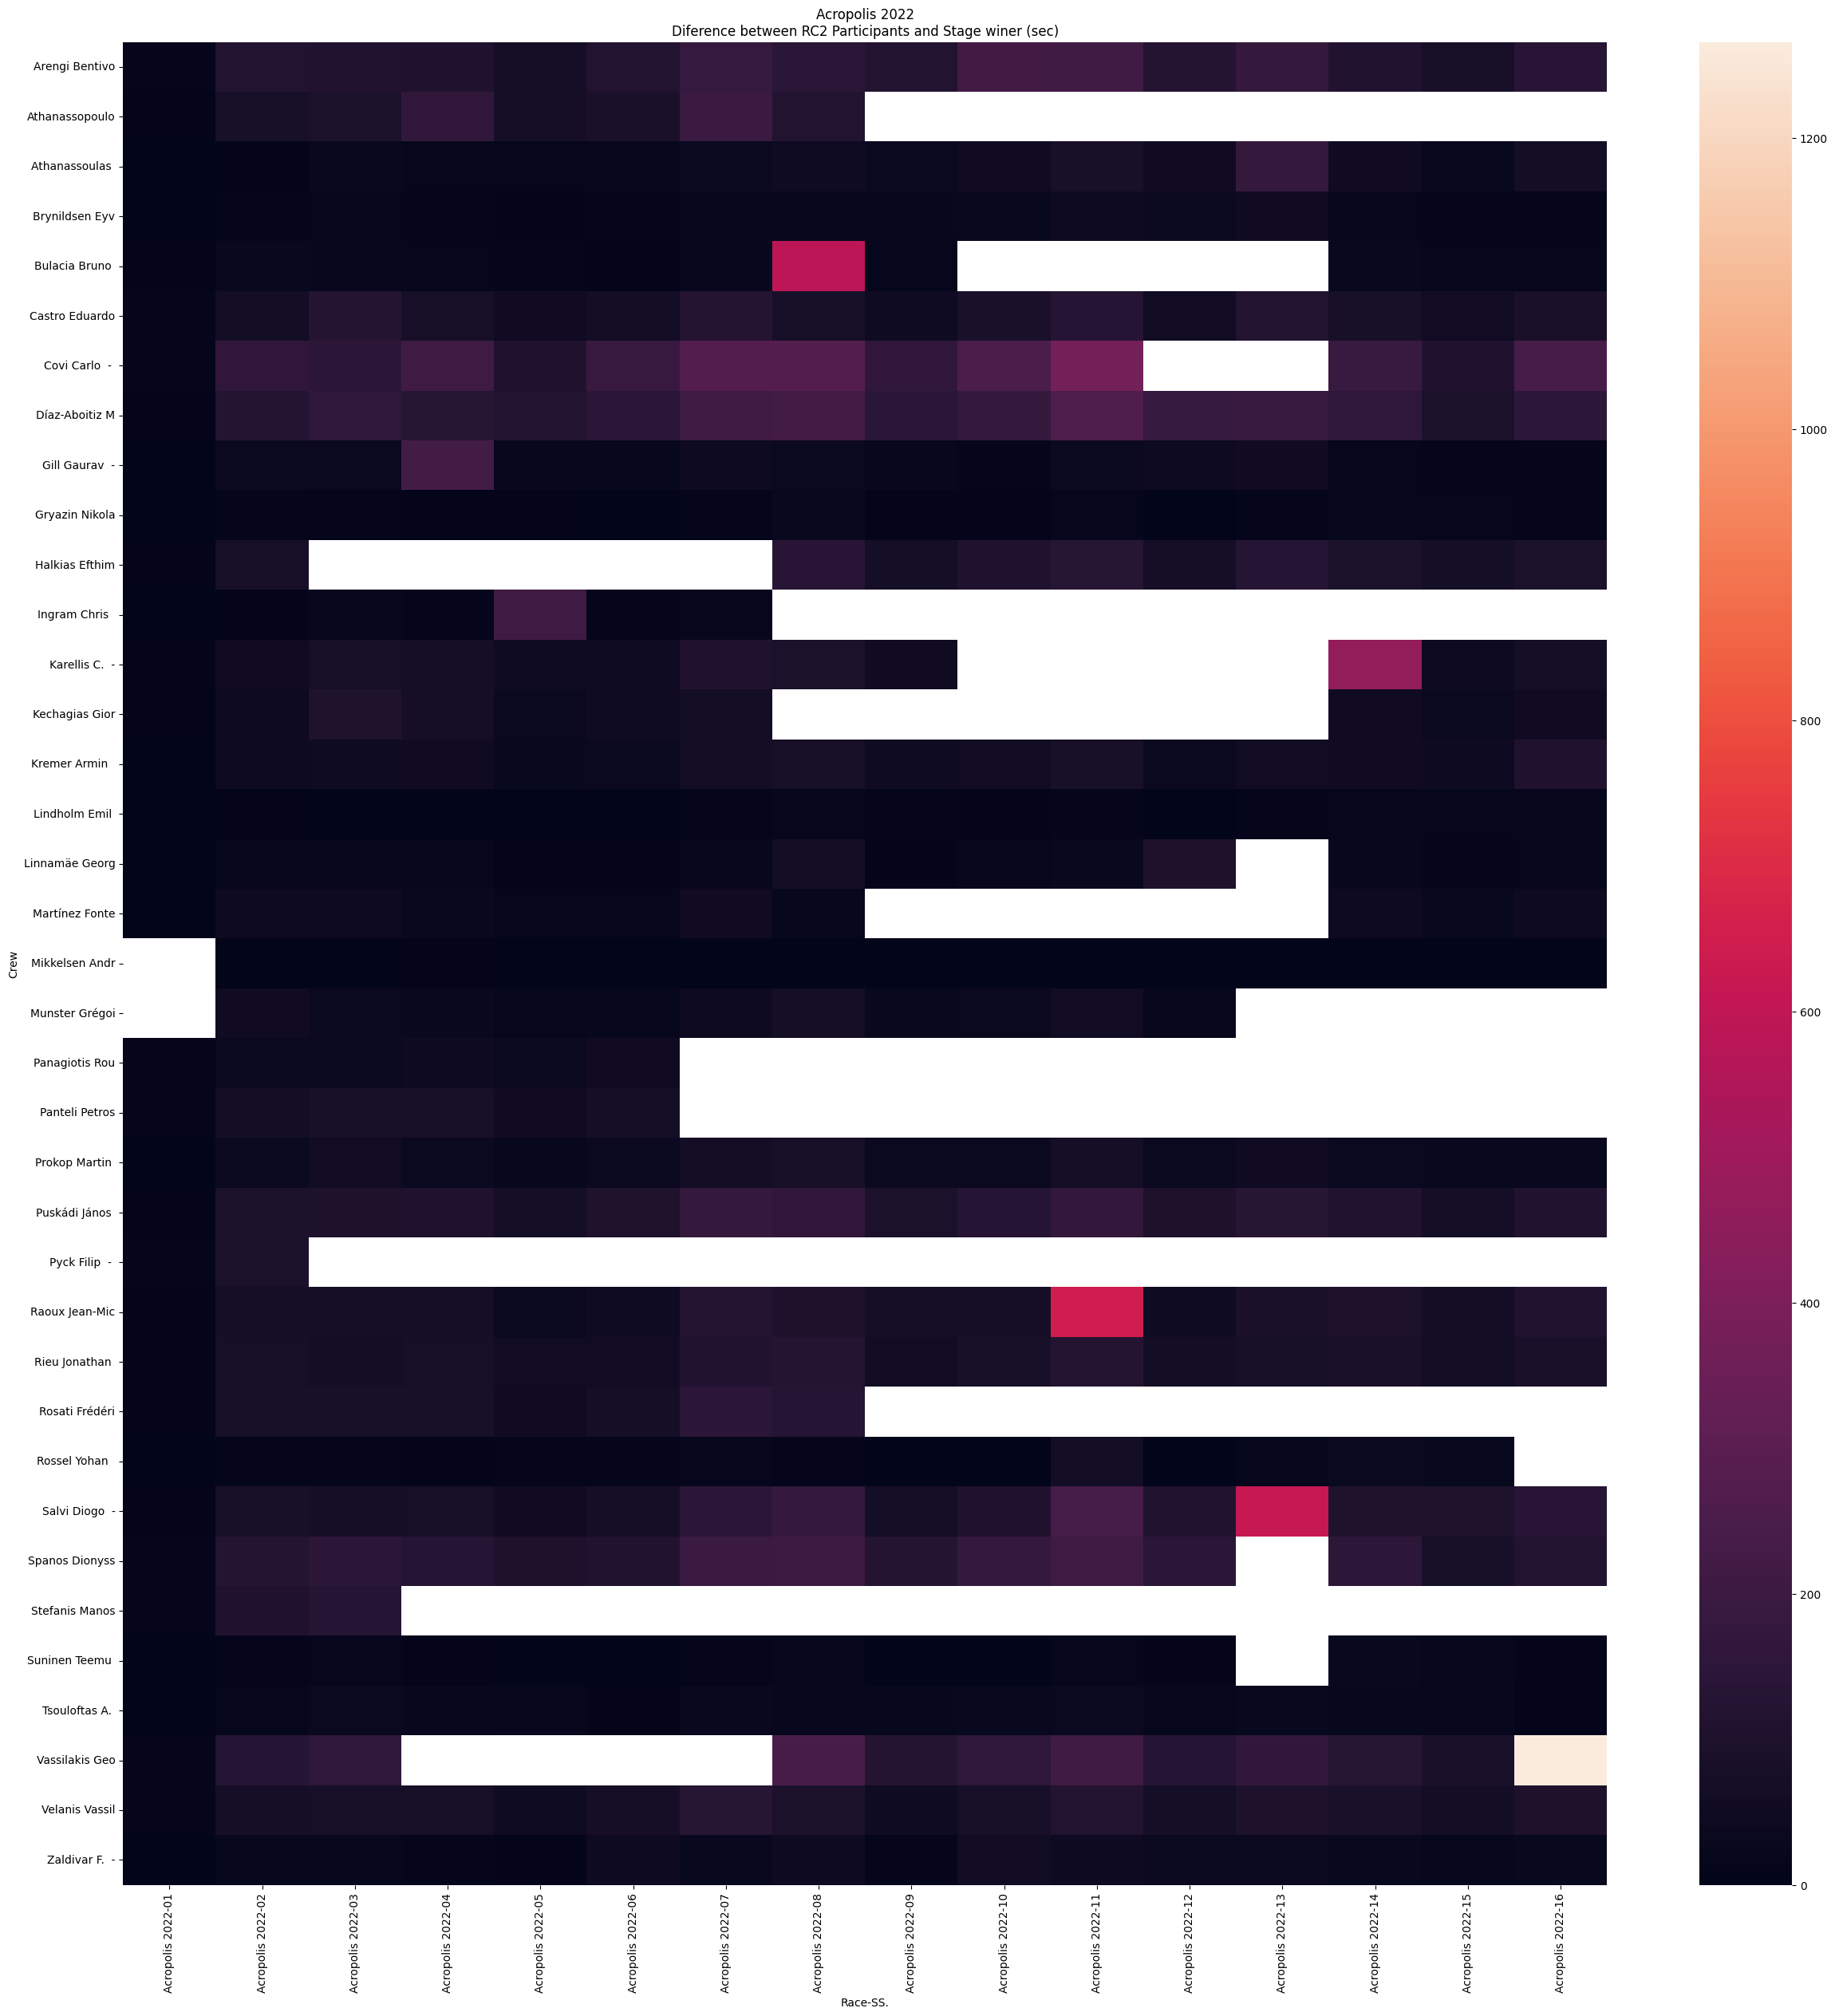

In [14]:
fig,ax = plt.subplots()
fig.set_size_inches(30,30)
Heatmap_ALL = sns.heatmap(ss_times_F4)
plt.title(rallyname+'\nDiference between '+ Group + ' Participants and Stage winer (sec)')
plt.savefig("Heatmap_" + Group + ".png")
plt.show()

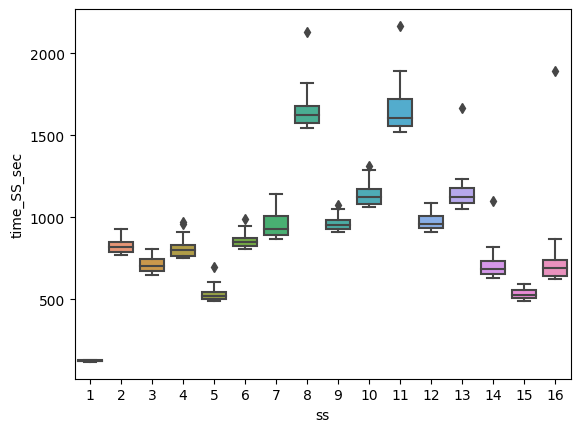

In [40]:
bplt=sns.boxplot( y=ss_times_WRC["time_SS_sec"], x=ss_times_WRC["ss"])
plt.savefig("Boxplot_" + Group + ".png")

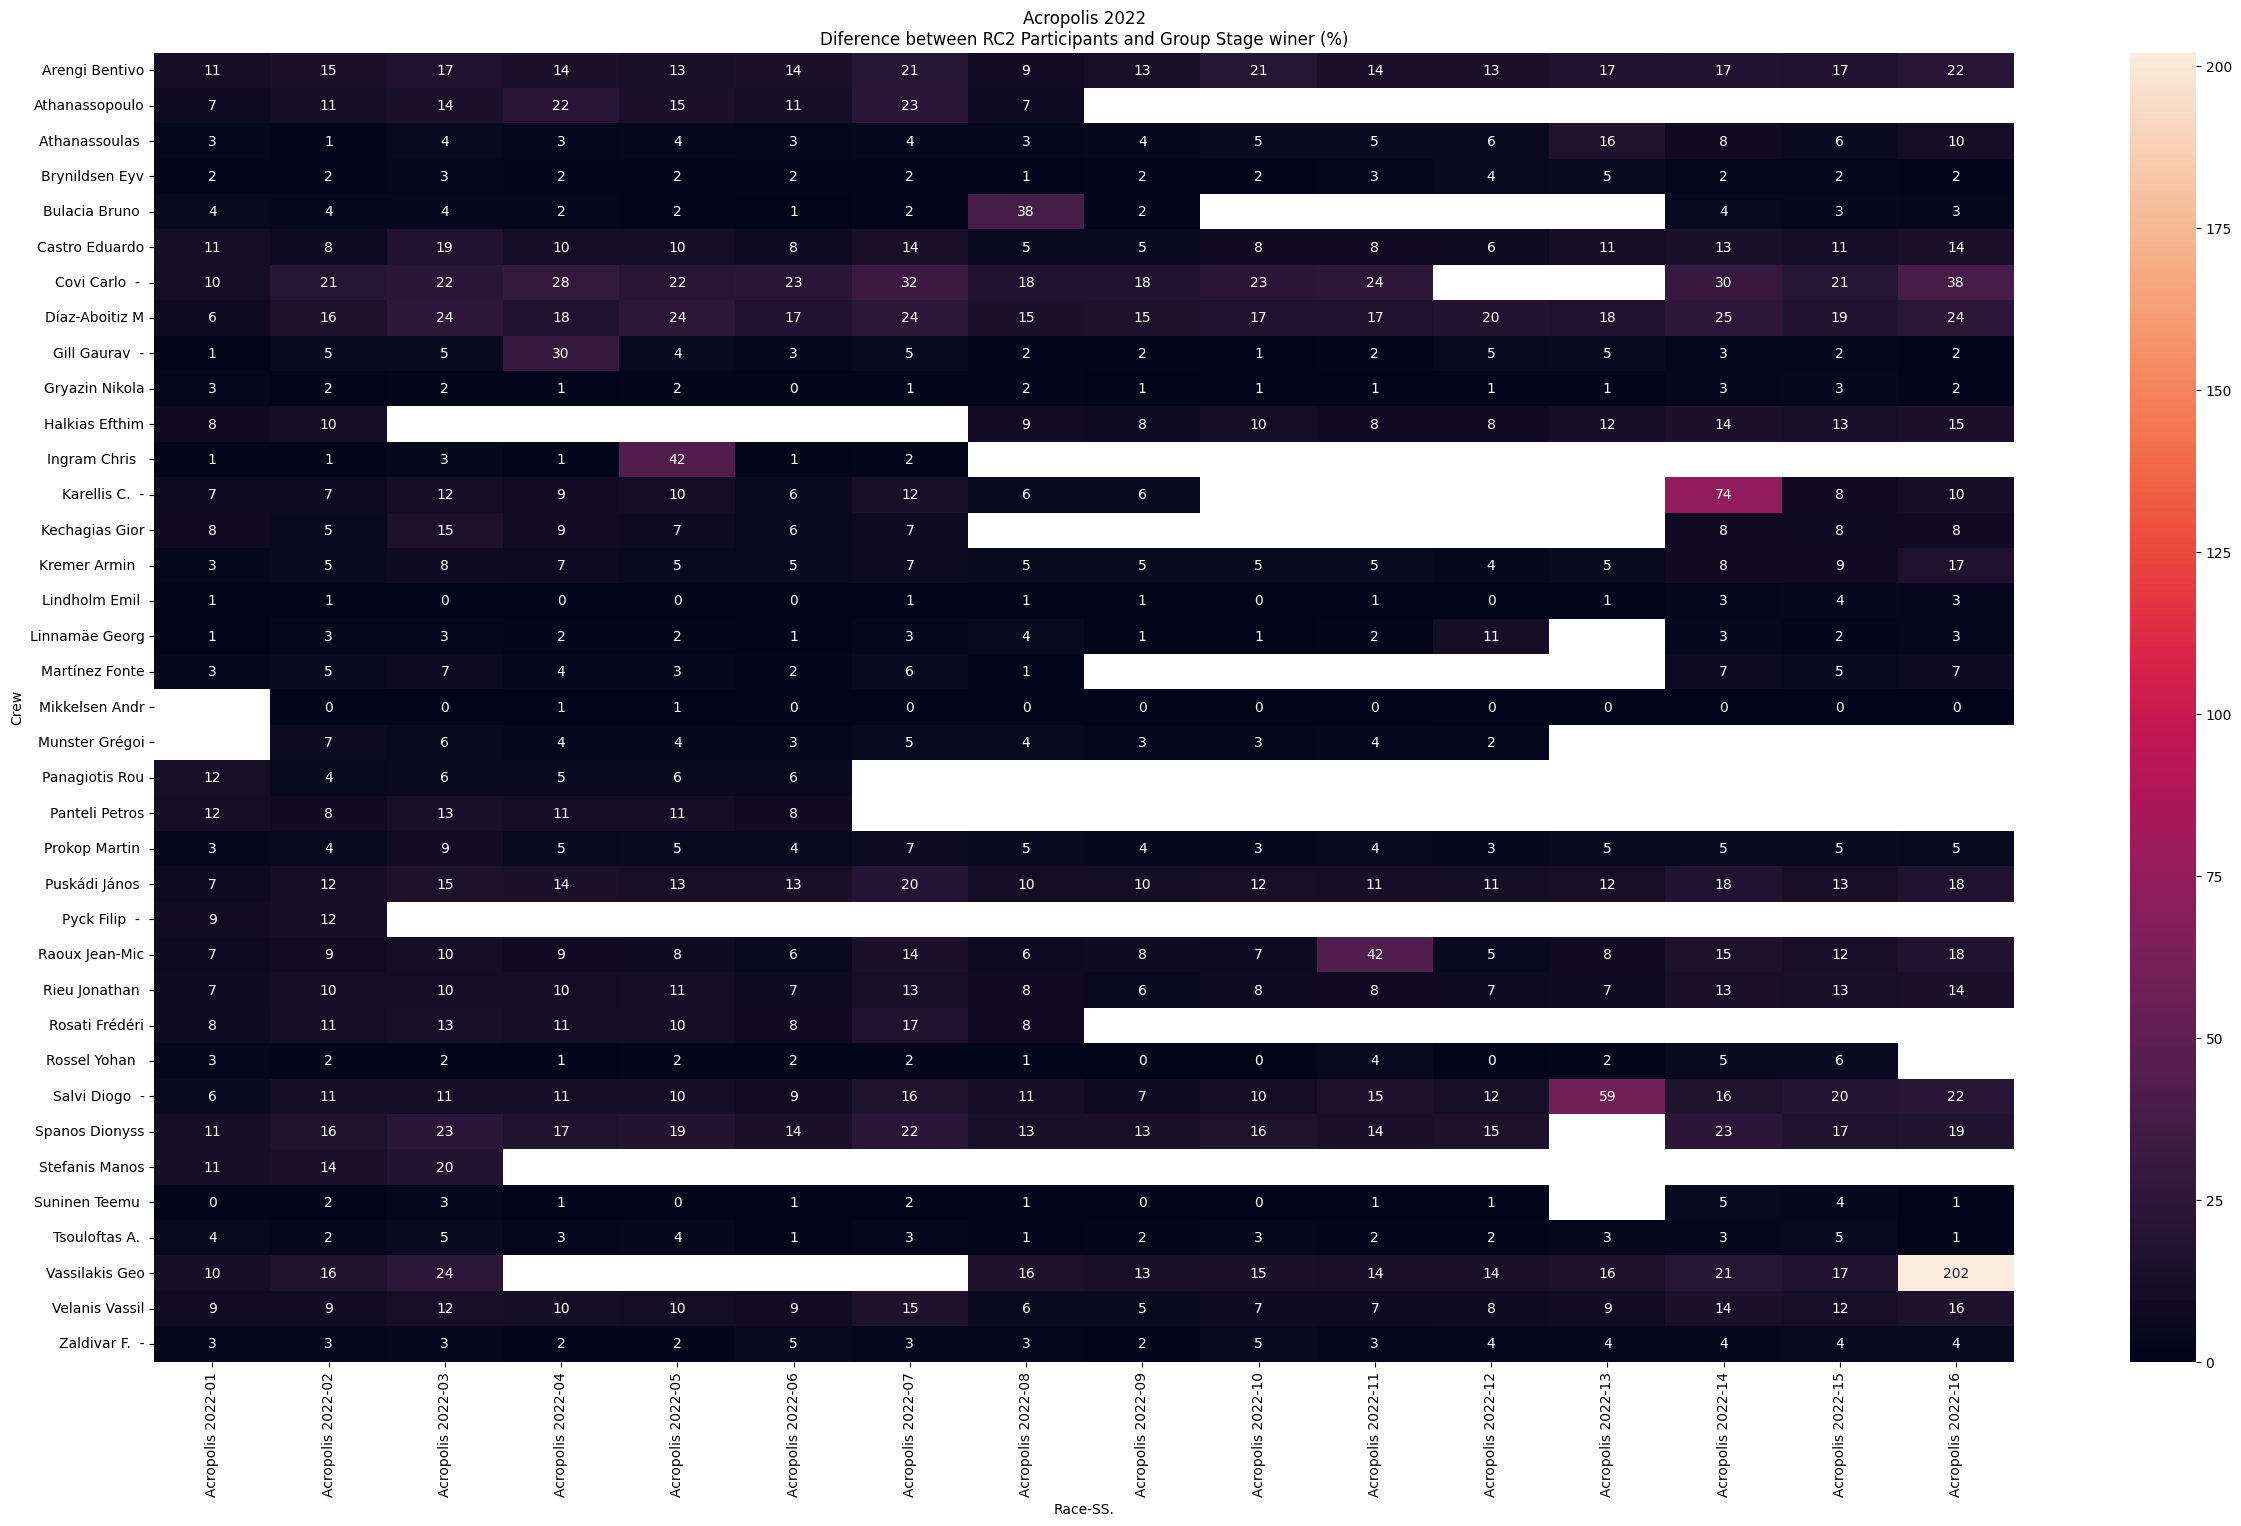

In [17]:
#ss_times_F3
fig,ax = plt.subplots()
fig.set_size_inches(30,17)
ss_timesa = pd.pivot_table(ss_times_F3, values='diff_G%', index='Crew', columns=['Race', 'SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f')
plt.title(rallyname +'\nDiference between ' + Group + ' Participants and Group Stage winer (%)')
plt.savefig(rallyname + Group + ".jpg")
plt.show()